In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
#cardioData = pd.read_csv('test.csv').drop('age', axis=1)
cardioData = pd.read_csv('cardio.csv').drop('age', axis=1)

### Logistic Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = cardioData.drop('cardio_bool', axis=1)

# One-hot encode categorical variables
categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
data = pd.get_dummies(data, columns=categorical_vars)

# Split data into features and target variable
X = data.drop('cardio', axis=1)
y = data['cardio']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale numeric features
scaler = StandardScaler()
numeric_vars = ['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

'''
# Make predictions on test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Define custom predict_with_threshold function
def predict_with_threshold(y_pred_prob, threshold):
    y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
    return y_pred

# Make predictions with custom threshold value
threshold = 0.5
y_pred = predict_with_threshold(y_pred_prob, threshold)
'''

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7184095353384858


### Confusion Matrix

<AxesSubplot: >

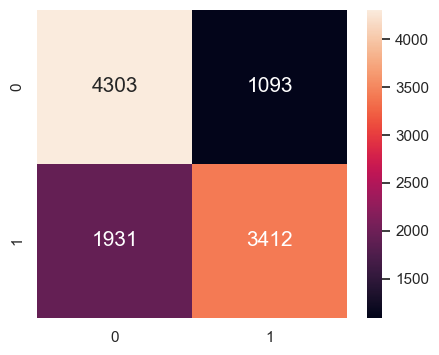

In [5]:
f, axes = plt.subplots(1, 1, figsize=(5, 4))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 15})

### FPR, TPR, Threshold

In [6]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#print(f'False Positive Rate: \n {fpr} \n')
#print(f'True Positive Rate: \n {tpr} \n')

#predict the probability of the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

#calculates fpr, tpr, thresholds (array)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

for i in range(len(thresholds)):
    print(f'Threshold: {thresholds[i]:.2f}, FPR: {fpr[i]:.6f}, TPR: {tpr[i]:.6f}')

Threshold: 1.99, FPR: 0.000000, TPR: 0.000000
Threshold: 0.99, FPR: 0.000000, TPR: 0.000187
Threshold: 0.98, FPR: 0.000000, TPR: 0.001684
Threshold: 0.98, FPR: 0.000185, TPR: 0.001684
Threshold: 0.98, FPR: 0.000185, TPR: 0.003930
Threshold: 0.98, FPR: 0.000371, TPR: 0.003930
Threshold: 0.98, FPR: 0.000371, TPR: 0.005241
Threshold: 0.98, FPR: 0.000556, TPR: 0.005241
Threshold: 0.97, FPR: 0.000556, TPR: 0.009732
Threshold: 0.97, FPR: 0.000927, TPR: 0.009732
Threshold: 0.96, FPR: 0.000927, TPR: 0.010481
Threshold: 0.96, FPR: 0.001112, TPR: 0.010481
Threshold: 0.96, FPR: 0.001112, TPR: 0.011230
Threshold: 0.96, FPR: 0.001297, TPR: 0.011230
Threshold: 0.96, FPR: 0.001297, TPR: 0.012540
Threshold: 0.96, FPR: 0.001483, TPR: 0.012540
Threshold: 0.96, FPR: 0.001483, TPR: 0.016470
Threshold: 0.96, FPR: 0.001668, TPR: 0.016470
Threshold: 0.96, FPR: 0.001668, TPR: 0.016844
Threshold: 0.96, FPR: 0.001853, TPR: 0.016844
Threshold: 0.96, FPR: 0.001853, TPR: 0.017593
Threshold: 0.96, FPR: 0.002039, TP

In [7]:
# Find index of point on ROC curve with given TPR and FPR values
tpr_value = 0.6
fpr_value = 0.2

#finds the index of the first threshold where tpr >= tpr_value and fpr <= fpr_value in the boolean array
index = ((tpr >= tpr_value) & (fpr <= fpr_value)).nonzero()[0][0]

# Find corresponding threshold value
threshold = thresholds[index]
print(f'Threshold: {threshold}')

Threshold: 0.5340356118196337


### ROC_Curve

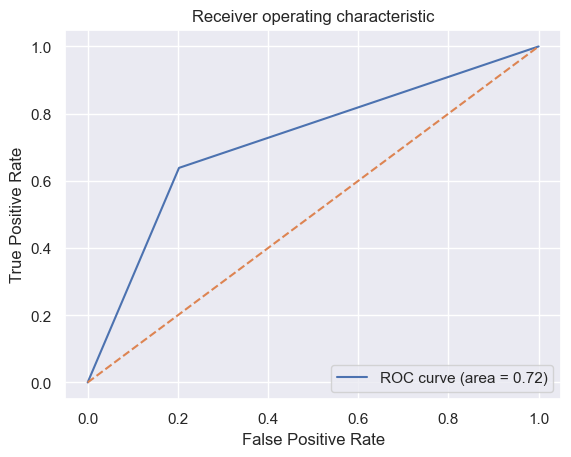

AUC: 0.7799037370692232


In [8]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

y_pred_proba = model.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc}')

An ROC (Receiver Operating Characteristic) curve is a plot that shows the performance of a binary classification model across all possible threshold values. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at different threshold values.

The true positive rate, also known as recall or sensitivity, is the ratio of true positives to the sum of true positives and false negatives. It measures how many of the actual positive instances were correctly identified by the model.

The false positive rate is the ratio of false positives to the sum of false positives and true negatives. It measures how many of the actual negative instances were incorrectly identified as positive by the model.

The ROC curve can be used to evaluate the performance of a binary classification model and to choose an appropriate threshold value for a specific problem. A model with high true positive rate and low false positive rate will have a curve that is close to the top left corner of the plot. You can choose an appropriate threshold value by finding the point on the curve that provides the best trade-off between true positive rate and false positive rate for your specific problem.

A higher threshold will result in fewer false positives but more false negatives, while a lower threshold will result in more false positives but fewer false negatives. 

In a ROC curve plot, the blue line represents the performance of your logistic regression model at different classification thresholds.The true positive rate (sensitivity) is plotted on the y-axis and the false positive rate (1 - specificity) is plotted on the x-axis. The closer the blue line is to the top left corner of the plot, the better your model is at distinguishing between positive and negative classes.

The yellow dotted line represents a random classifier, which has a true positive rate equal to the false positive rate for all classification thresholds. This line serves as a baseline for comparison with your logistic regression model. If your model performs better than a random classifier, the blue line will be above the yellow dotted line.


### Precision-Recall Curve

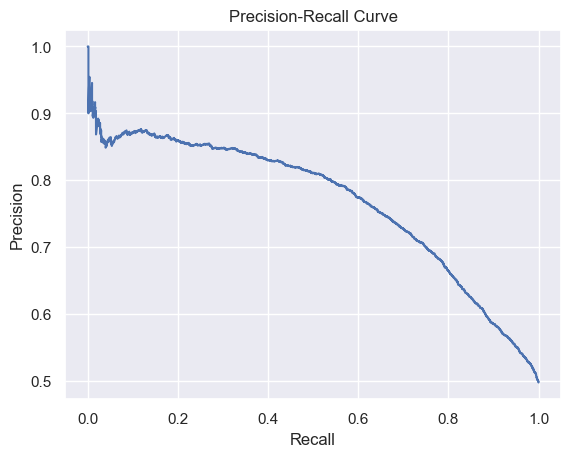

In [9]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

A precision-recall curve is a plot that shows the relationship between precision and recall for different threshold values in a binary classification problem. The curve is created by calculating the precision and recall for different threshold values and plotting them on a graph, with recall on the x-axis and precision on the y-axis.

The precision-recall curve can be used to evaluate the performance of a binary classification model and to choose an appropriate threshold value for a specific problem. A model with high precision and high recall will have a curve that is close to the top right corner of the plot. You can choose an appropriate threshold value by finding the point on the curve that provides the best trade-off between precision and recall for your specific problem.

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.7573806881243064
Recall: 0.6385925510013101
F1-score: 0.6929325751421609


Precision, recall and F1-score are performance metrics used to evaluate the performance of a binary classification model.

Precision is the ratio of true positives to the sum of true positives and false positives. It measures how many of the positive predictions made by the model are actually positive.

Recall is the ratio of true positives to the sum of true positives and false negatives. It measures how many of the actual positive instances were correctly identified by the model.

F1-score is the harmonic mean of precision and recall. It provides a single measure that balances both precision and recall.

### Precision sample

In [11]:
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted Probability': y_pred_prob})

# Take a random sample of 100 observations
sampled_results = results.sample(n=50, random_state=0)

# Print actual and predicted values for sampled observations
for i, row in sampled_results.iterrows():
    if row["Predicted Probability"] > 0.5:
        print(f'Actual: {int(row["Actual"])}, Predicted: 1, Predicted Probability: {row["Predicted Probability"]:.2f}')
    else:
        print(f'Actual: {int(row["Actual"])}, Predicted: 0, Predicted Probability: {row["Predicted Probability"]:.2f},')

Actual: 0, Predicted: 0, Predicted Probability: 0.36,
Actual: 1, Predicted: 1, Predicted Probability: 0.89
Actual: 0, Predicted: 0, Predicted Probability: 0.39,
Actual: 0, Predicted: 0, Predicted Probability: 0.42,
Actual: 1, Predicted: 1, Predicted Probability: 0.74
Actual: 1, Predicted: 0, Predicted Probability: 0.44,
Actual: 1, Predicted: 1, Predicted Probability: 0.86
Actual: 1, Predicted: 1, Predicted Probability: 0.76
Actual: 1, Predicted: 1, Predicted Probability: 0.79
Actual: 0, Predicted: 0, Predicted Probability: 0.39,
Actual: 0, Predicted: 0, Predicted Probability: 0.17,
Actual: 0, Predicted: 0, Predicted Probability: 0.42,
Actual: 1, Predicted: 0, Predicted Probability: 0.27,
Actual: 1, Predicted: 1, Predicted Probability: 0.97
Actual: 1, Predicted: 1, Predicted Probability: 0.83
Actual: 0, Predicted: 0, Predicted Probability: 0.43,
Actual: 1, Predicted: 0, Predicted Probability: 0.45,
Actual: 1, Predicted: 1, Predicted Probability: 0.72
Actual: 1, Predicted: 0, Predicted P

In a binary classification problem, a logistic regression model outputs the probability that a given data point belongs to the positive class. This probability can be used to make a prediction by setting a threshold value, typically 0.5. If the predicted probability is greater than the threshold, the data point is predicted to belong to the positive class, otherwise it is predicted to belong to the negative class.

By displaying the predicted probabilities for each test data point along with the actual class label, you can see how confident the model is in its predictions. For example, if a data point has a predicted probability close to 1 or 0, it means that the model is very confident in its prediction. On the other hand, if the predicted probability is close to 0.5, it means that the model is less confident in its prediction.


### Predicting new data points

In [37]:
# Assuming that you have already loaded the new dataset into a DataFrame called 'new_data'

# One-hot encode categorical variables
new_data = pd.read_csv('test.csv')
categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
new_data = pd.get_dummies(new_data, columns=categorical_vars)

# Get feature names from training data
feature_names = X_train.columns

# Select the feature columns from the new dataset
X_new = new_data[feature_names]

# Scale numeric features using the same scaler fitted on the training data
X_new.loc[:, numeric_vars] = scaler.transform(X_new[numeric_vars])


# Use the trained logistic regression model to make predictions on the new data
y_pred = model.predict(X_new)

test_data = pd.read_csv('test.csv')

# Add the predictions as a new column in the new dataset
test_data['cardio_pred'] = y_pred

print(test_data)

test_data.to_csv('result.csv', index=False)


      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   18393       2     168      62    110     80            1     1      0   
1   20228       1     156      85    140     90            3     1      0   
2   18857       1     165      64    130     70            3     1      0   
3   17623       2     169      82    150    100            1     1      0   
4   22113       1     157      93    130     80            3     1      0   
5   22584       2     178      95    130     90            3     3      0   
6   17668       1     158      71    110     70            1     1      0   
7   22530       1     169      80    120     80            1     1      0   
8   18815       2     173      60    120     80            1     1      0   
9   14791       2     165      60    120     80            1     1      0   
10  19809       1     158      78    110     70            1     1      0   
11  21296       1     170      75    130     70            1     1      0   

C:\Users\86150\AppData\Local\Temp\ipykernel_20464\58048797.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.loc[:, numeric_vars] = scaler.transform(X_new[numeric_vars])


Reference

https://blog.finxter.com/sklearn-fit-vs-transform-vs-fit_transform-whats-the-difference/

https://www.geeksforgeeks.org/what-is-the-difference-between-transform-and-fit_transform-in-sklearn-python/

https://www.datacamp.com/tutorial/understanding-logistic-regression-python

https://www.datacamp.com/tutorial/categorical-data

https://www.datacamp.com/tutorial/precision-recall-curve-tutorial

